In [15]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import numpy as np

In [16]:
env = gym.make('CartPole-v1', render_mode="rgb_array")

In [17]:
observation, info = env.reset(seed=2526)


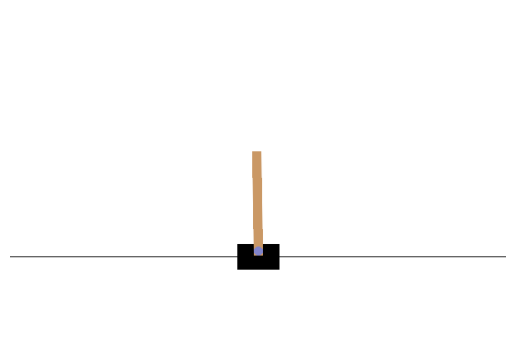

In [18]:
# Render and display first frame
frame = env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()


In [19]:
# Take one step
action = 1
observation, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated

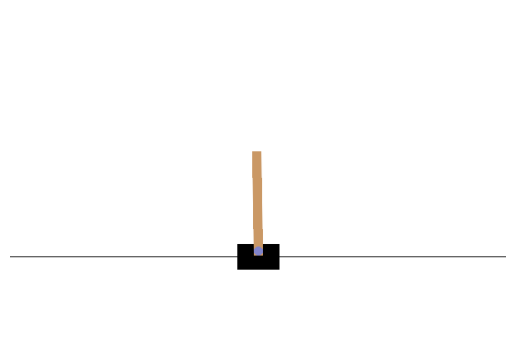

In [20]:
# Render and display next frame
frame = env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

In [21]:
env.action_space

Discrete(2)

In [22]:
#these floats represent the cart’s 
# horizontal position (0.0 = center), 
# its velocity (positive means right), 
# the angle of the pole (0.0 = vertical), and its
# angular velocity (positive means clockwise)
observation

array([ 0.00469439,  0.15538783, -0.01677532, -0.32982504], dtype=float32)

In [23]:
reward

1.0

In [24]:
info

{}

In [25]:
terminated

False

In [26]:
truncated

False

In [27]:
def basic_policy(observation):
    angle = observation[2]
    return 0 if angle < 0 else 1
totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset(seed=2526)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, terminated,truncated, info = env.step(action)
        done = terminated or truncated
        episode_rewards += reward

        if done:
            break
    totals.append(episode_rewards)

In [28]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(52.0, 0.0, 52.0, 52.0)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
n_inputs = 4
model = keras.models.Sequential([
    keras.layers.Dense(5, activation='elu', input_shape=[n_inputs]),
    keras.layers.Dense(1, activation='sigmoid')
])